# UK Greenhouse Gas Model

Pete Siharath

# Running all initial imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading File

Here we will read the excel file using pandas' read_excel function which parses through an excel file and outputs a Pandas dataframe. Since we are looking at the total greenhouse gases emitted, the sheet titled "GHG total " is sheet which is most appropriate to parse through.

In this sheet there are two tables. The top table categorises greenhouse gases emitted by whole industry sections (e.g. construction or manufacturing) while the bottom table is categorised by groups within these sections. Since we are interested in the total greenhouses gases emitted, we will parse through the less-detailed top table.

Using our function, we will make sure to parse through this table by parsing through rows 4 - 27

In [ ]:
file = "./atmoshpericemissionsghg.xlsx"
df_emissions = pd.read_excel(file, sheet_name="GHG total ", skiprows=3, nrows=24)

Looking at a brief summary of this dataframe

In [ ]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21 non-null     object 
 1   Unnamed: 1  0 non-null      float64
 2   Unnamed: 2  22 non-null     object 
 3   1990        22 non-null     float64
 4   1991        22 non-null     float64
 5   1992        22 non-null     float64
 6   1993        22 non-null     float64
 7   1994        22 non-null     float64
 8   1995        22 non-null     float64
 9   1996        22 non-null     float64
 10  1997        22 non-null     float64
 11  1998        22 non-null     float64
 12  1999        22 non-null     float64
 13  2000        22 non-null     float64
 14  2001        22 non-null     float64
 15  2002        22 non-null     float64
 16  2003        22 non-null     float64
 17  2004        22 non-null     float64
 18  2005        22 non-null     float64
 19  2006        22 non-null     flo

# Cleaning Data

As we can clearly see from the summary of the dataframe, there are a few things which need to be cleaned before we start suggesting models for the data.

First of all, there are three unnamed columns. Looking at the excel spreadsheet, the first column is filled with letters A-T. The second column is empty and the third column is the name of the industry section.

We will drop the empty column and the letters containing the letters and rename the third column to "Section" and set this as the index column to allow us to index through the dataframe using the name of the industry section

There is also an empty row so we remove this by using .dropna() which removes any rows that has an empty cell. In this case, the only row with an empty cell is this empty row.

In [ ]:
df_emissions = df_emissions.drop(labels=["Unnamed: 0", "Unnamed: 1"], axis=1)
df_emissions = df_emissions.rename(columns={"Unnamed: 2": "Section"})
df_emissions = df_emissions.set_index("Section")
df_emissions = df_emissions.dropna()

In [ ]:
df_emissions

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Section,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry and fishing",55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,56132.4,55674.8,55680.5,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040.0
Mining and quarrying,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,46035.6,44644.9,40727.5,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4
Manufacturing,176067.9,177032.4,170118.3,165079.3,168003.9,166085.4,167363.6,166017.9,158150.0,143983.1,...,89688.4,92323.8,91436.1,88752.1,84312.4,85314.2,84017.6,83794.9,80927.2,81593.9
"Electricity, gas, steam and air conditioning supply",217638.6,214348.2,202484.4,185006.1,180725.0,178167.0,177971.4,164572.8,170829.8,163215.0,...,178586.4,169386.4,148443.9,132014.9,110073.4,99866.9,95829.7,89371.3,80310.9,86080.9
"Water supply; sewerage, waste management and remediation activities",75232.5,76756.7,76870.8,77189.4,77556.2,78634.3,79137.0,77930.1,78942.1,74187.8,...,32164.5,29286.8,27392.9,27221.5,27117.4,28111.6,28407.5,27934.3,26552.4,26551.4
Construction,5786.8,5946.2,6058.3,6124.1,6391.0,6424.0,6677.6,6914.9,7130.9,7402.4,...,8533.9,8430.5,8629.3,9185.6,9761.4,9913.5,10021.1,9925.4,9150.9,10196.5
Wholesale and retail trade; repair of motor vehicles and motorcycles,12127.0,12490.8,12324.7,12571.6,12970.1,13152.4,13486.1,13410.2,13778.1,14343.3,...,17650.2,17277.7,17099.7,17229.4,17487.3,17015.4,16542.8,16086.8,14267.5,14945.0
Transport and storage,66667.4,67119.0,68163.3,69528.8,70523.6,73415.5,79112.2,88152.6,93145.3,91479.0,...,83237.3,80131.4,85013.2,86923.5,89634.3,83261.5,88024.5,86628.1,62349.6,56753.8
Accommodation and food services,3139.2,3550.4,3270.5,3475.9,3453.5,3560.8,3742.7,3362.0,3542.4,3692.0,...,3598.9,3679.9,3270.0,3615.9,3708.0,3681.9,3641.4,3623.9,3112.6,3448.5


# Investigating the Model

To find out how to model this data, we should look at some plots of the data.

Plotting a scatter graph of total greenhouse gas emissions against the year.

[Text(0, 0.5, 'Greenhouse gas emissions (million tonnes)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Greenhouse gas emissions per year')]

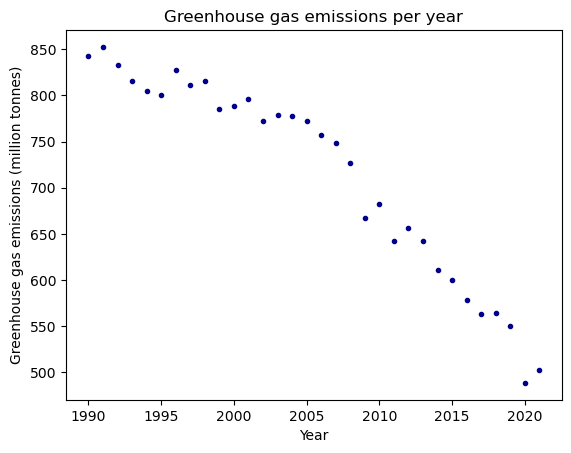

In [24]:
fig, ax = plt.subplots()

df_total_emissions = df_emissions.loc["Total greenhouse gas emissions"]
years = pd.DataFrame(np.arange(1990, 2022))

ax.scatter(years, df_total_emissions / 1000, marker=".", c="darkblue")
ax.set(ylabel="Greenhouse gas emissions (million tonnes)", 
       xlabel="Year", 
       title="Greenhouse gas emissions per year")

The scatter graph above gives us a slight idea on how to create our model but we should look into more detail on how we should do this.

The Seaborn library is useful as it gives us a useful tool in the form of a residual plot. We can input our dataframes and a polynomial order number and it will plot a residual graph based on the polynomial regression of the data.

In [ ]:
import seaborn as sns

We will plot the residuals based on an order 1 polynomial (linear).

[Text(0, 0.5, 'Residual greenhouse gas emissions'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Residual greenhouse gas emissions for linear model')]

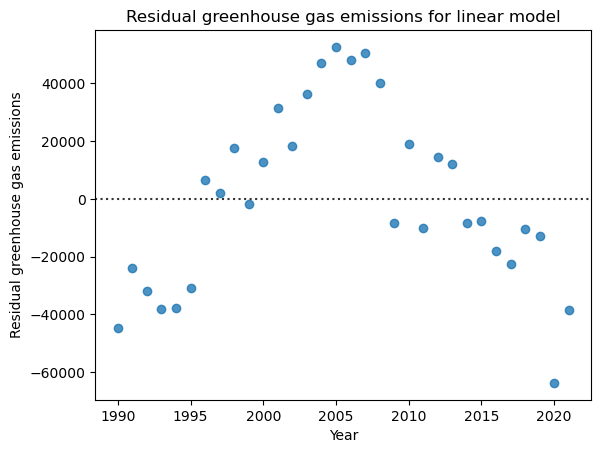

In [ ]:
ax = sns.residplot(x=years, y=df_total_emissions, order=1)
ax.set(ylabel="Residual greenhouse gas emissions", 
       xlabel="Year", 
       title="Residual greenhouse gas emissions for linear model")

Based on the plot above, it seems as if the data can be modelled with two different linear models. However, we should confirm these suspicions by checking polynomials of higher orders

[Text(0, 0.5, 'Residual greenhouse gas emissions'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Residual greenhouse gas emissions for polynomial order 4')]

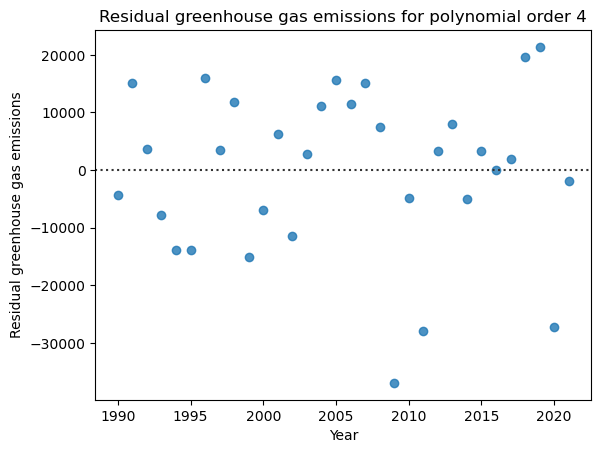

In [ ]:
ax = sns.residplot(x=years, y=df_total_emissions, order=4)
ax.set(ylabel="Residual greenhouse gas emissions", 
       xlabel="Year", 
       title="Residual greenhouse gas emissions for polynomial order 4")

Despite the residuals seeming more randomly scattered, there is still a noticeable peak around the 2007 mark which convinces us to split the data into two parts.

To fully confirm these suspicions, we will also check for an exponential relationship by taking the logarithm of the greenhouse gases.

[Text(0, 0.5, 'Residual logarithmic greenhouse gas emissions'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Residual greenhouse gas emissions for exponential model')]

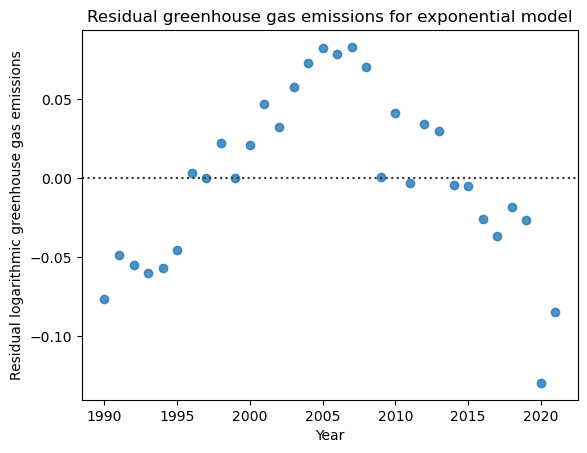

In [ ]:
df_log_emissions = np.log(df_total_emissions)
ax = sns.residplot(x=years, y=df_log_emissions, order=1)
ax.set(ylabel="Residual logarithmic greenhouse gas emissions", 
       xlabel="Year", 
       title="Residual greenhouse gas emissions for exponential model")

At this point, we can be visually convinced that the data should be split into two parts. But to take it one step further, we can also validate this model by performing a train test split.

This randomly splits the data into two, a dataset for training and a dataset for testing. We use the training dataset for creating the model. Then we use this model to predict the data for the testing dataset. We can then perform statistical calculations to evaluate how close this "trained" model is to the testing dataset.

We should test the linear model for both parts of the data. One part should be for data before 2008 and one part should be for data for 2008 and after. We will test the before 2008 data first.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
random_state = 100
df_emissions_before_08 = df_total_emissions[:18]

years_before_08 = pd.DataFrame(np.arange(1990, 2008))

train_years_before, test_years_before = train_test_split(years_before_08, random_state=random_state)
train_emissions_before, test_emissions_before = train_test_split(df_emissions_before_08, random_state=random_state)

linear_model_before = LinearRegression()

linear_model_before.fit(train_years_before, train_emissions_before)

predicted_emissions_before = linear_model_before.predict(test_years_before)

Using the model we have made above, we can look at a few statistics to see how well our model has performed. 

The r^2 score, or coefficient of determination, is a statistic which represents whether our model is suitable. A r^2 score typically ranges from 0 to 1, where 1 is a perfect model and 0 is a bad model.

The root mean squared error is a statistic which sums the squared difference between the predicted emissions and the test emissions and then roots this answer. A good model should have a low root mean squared error relative to the values of the emissions.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print(f"r^2 score: {r2_score(predicted_emissions_before, test_emissions_before)}")
print(f"root mean squared error: {mean_squared_error(predicted_emissions_before, test_emissions_before, squared=False)}")

r^2 score: 0.802855109038781
root mean squared error: 10800.446563827734


The r^2 score is high and the root mean squared error is low. Therefore, we can be satisfied with a linear model for before 2007.

Now let's test a linear model for 2007 and after using the same method.

In [ ]:
df_emissions_after_07 = df_total_emissions[18:]
years_after_07 = pd.DataFrame(np.arange(2008, 2022))

train_years_after, test_years_after = train_test_split(years_after_07, random_state=random_state)
train_emissions_after, test_emissions_after = train_test_split(df_emissions_after_07, random_state=random_state)

linear_model_after = LinearRegression()

linear_model_after.fit(train_years_after, train_emissions_after)

predicted_emissions_after = linear_model_after.predict(test_years_after)

In [ ]:
print(f"r^2 score: {r2_score(predicted_emissions_after, test_emissions_after)}")
print(f"root mean squared error: {mean_squared_error(predicted_emissions_after, test_emissions_after, squared=False)}")

r^2 score: 0.8974715632947308
root mean squared error: 23366.01577392605


In this case, the r^2 score is still high and the root mean squared error is low. Therefore, we can also be satisfied with a linear model for after 2007.

# Creating Model for Provisional Years

In order to create a model which will be used to predict the next 5 years, we need to make a big assumption. This assumption will be that the next 5 years can be modelled the same way that has been previously modelled.

We will now create this model.

In [ ]:
years_prov = pd.DataFrame(np.arange(2022, 2027))

linear_model_prov = LinearRegression()

linear_model_prov.fit(years_after_07, df_emissions_after_07)

predicted_emissions_prov = linear_model_prov.predict(years_prov)

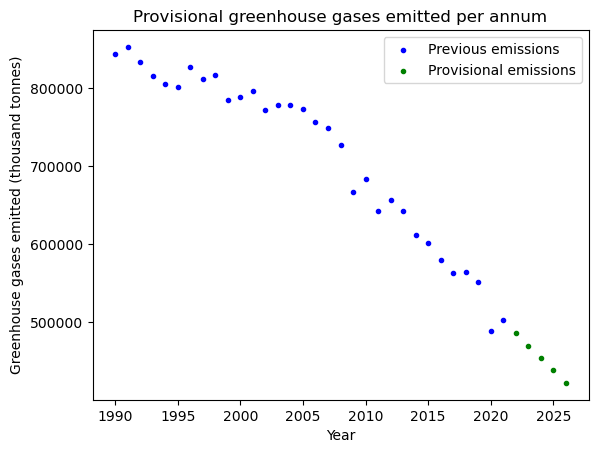

In [21]:
fig, ax = plt.subplots()
ax.scatter(years, df_total_emissions, c="blue", label="Previous emissions", marker=".")
ax.scatter(years_prov, predicted_emissions_prov, c="green", label="Provisional emissions", marker=".")
ax.set(ylabel="Greenhouse gases emitted (thousand tonnes)", 
       xlabel="Year", 
       title="Provisional greenhouse gases emitted per annum")
ax.legend()

In [ ]:
prediction_year = np.array([2050])
linear_model_prov.predict(prediction_year.reshape(1, -1))[0]

37911.488791208714